Functionally Stable Networks

In [1]:
# Import necessary libraries
import mne
import os
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import pickle 
from sklearn.cluster import SpectralClustering

In [2]:
# Define constants
electrodes = ['FP1', 'FP2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'T3', 'C3', 'CZ', 'C4', 'T4', 'T5', 'P3', 'PZ', 'P4', 'T6', 'O1', 'O2']

In [3]:
def extract_fnsz_channels(file_path):
    """
    Extract channel names corresponding to rows with the label 'fnsz' for each start and stop time,
    merging times that are 5 seconds or less apart into the earliest time for start and largest for stop.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        dict: A dictionary where keys are tuples of (merged_start_time, merged_stop_time)
              and values are lists of channel names.
    """
    try:
        # Load CSV data, skipping lines that start with '#'
        data = pd.read_csv(file_path, comment='#')

        # Filter rows with the label 'fnsz'
        fnsz_data = data[data['label'] == 'fnsz']

        # Helper function to convert differential montage channels to detailed channel names
        def convert_channel_to_detailed(channel):
            return channel.split('-')  # Split into parts for detailed representation

        # Sort and merge start times if they are within 5 seconds
        sorted_start_times = sorted(fnsz_data['start_time'].unique())
        merged_start_times = []
        current_group = [sorted_start_times[0]]

        for i in range(1, len(sorted_start_times)):
            if sorted_start_times[i] - current_group[-1] <= 5:
                current_group.append(sorted_start_times[i])
            else:
                merged_start_times.append(current_group)
                current_group = [sorted_start_times[i]]
        merged_start_times.append(current_group)  # Add the last group

        start_time_mapping = {
            time: group[0] for group in merged_start_times for time in group
        }

        # Map each start time to the merged start time
        fnsz_data['merged_start_time'] = fnsz_data['start_time'].map(start_time_mapping)

        # Sort and merge stop times if they are within 5 seconds
        sorted_stop_times = sorted(fnsz_data['stop_time'].unique())
        merged_stop_times = []
        current_group = [sorted_stop_times[0]]

        for i in range(1, len(sorted_stop_times)):
            if sorted_stop_times[i] - current_group[-1] <= 5:
                current_group.append(sorted_stop_times[i])
            else:
                merged_stop_times.append(current_group)
                current_group = [sorted_stop_times[i]]
        merged_stop_times.append(current_group)  # Add the last group

        stop_time_mapping = {
            time: group[-1] for group in merged_stop_times for time in group
        }

        # Map each stop time to the merged stop time
        fnsz_data['merged_stop_time'] = fnsz_data['stop_time'].map(stop_time_mapping)

        # Group by 'merged_start_time' and 'merged_stop_time' and extract unique, detailed channels for each group
        focal_zone_channels = (
            fnsz_data.groupby(['merged_start_time', 'merged_stop_time'])['channel']
            .apply(lambda channels: list(
                set(
                    detailed_channel
                    for ch in channels.unique()
                    for detailed_channel in convert_channel_to_detailed(ch)
                ) & set(electrodes) 
            ))
            .to_dict()
        )

        return focal_zone_channels

    except Exception as e:
        print(f"Error processing file '{file_path}': {e}")
        return {}

In [4]:
# # Load the saved data
# with open("epgb_1t3760.pkl", "rb") as f: # 0 to 111
#     loaded_data = pickle.load(f)
# all_data = loaded_data 

# # Specify the folder path containing the EDF files
# folder_path = 'C:/Users/Atena/Documents/edf'
# # Specify the folder path containing the CSV files
# folder_path_csv = 'C:/Users/Atena/Documents/csv'

In [5]:
# I had to do this step by step as I had analyzed and saved the data seperately due to computational cost!

# Load the saved data
with open("epgb_0t110.pkl", "rb") as f: # 0 to 111
    loaded_data = pickle.load(f)
all_data1 = loaded_data 

with open("epgb_112t232.pkl", "rb") as f: # 112 to 232
    loaded_data = pickle.load(f)
all_data2 = loaded_data   

with open("epgb_233t325.pkl", "rb") as f: # 233 to 325
    loaded_data = pickle.load(f)
all_data3 = loaded_data   

with open("epgb_346t455.pkl", "rb") as f: # 346 to 455
    loaded_data = pickle.load(f)
all_data4 = loaded_data

with open("epgb_456t570.pkl", "rb") as f: # 456 to 570
    loaded_data = pickle.load(f)
all_data5 = loaded_data   

with open("epgb_571t760.pkl", "rb") as f: # 571 to 760
    loaded_data = pickle.load(f)
all_data6 = loaded_data    

with open("epgb_761t975.pkl", "rb") as f: # 761 to 975
    loaded_data = pickle.load(f)
all_data7 = loaded_data 

with open("epgb_976t1250.pkl", "rb") as f: # 976 to 1250
    loaded_data = pickle.load(f)
all_data8 = loaded_data   

with open("epgb_1251t1386.pkl", "rb") as f: # 1251 to 1386
    loaded_data = pickle.load(f)
all_data9 = loaded_data   

with open("epgb_1388t2018.pkl", "rb") as f: # 1389 to 2018
    loaded_data = pickle.load(f)
all_data10 = loaded_data   

with open("epgb_2019t2822.pkl", "rb") as f: # 2019 to 2822
    loaded_data = pickle.load(f)
all_data11 = loaded_data  

with open("epgb_2823t3764.pkl", "rb") as f: # 2823 to 3763
    loaded_data = pickle.load(f)
all_data12 = loaded_data   

all_data2 = {key+112: value for key, value in all_data2.items()}
all_data3 = {key+233: value for key, value in all_data3.items()}
all_data4 = {key+346: value for key, value in all_data4.items()}
all_data5 = {key+456: value for key, value in all_data5.items()}
all_data6 = {key+571: value for key, value in all_data6.items()}
all_data7 = {key+761: value for key, value in all_data7.items()}
all_data8 = {key+976: value for key, value in all_data8.items()}
all_data9 = {key+1251: value for key, value in all_data9.items()}
all_data10 = {key+1389: value for key, value in all_data10.items()}
all_data11 = {key+2019: value for key, value in all_data11.items()}
all_data12 = {key+2823: value for key, value in all_data12.items()}
all_data = all_data1 | all_data2 | all_data3 | all_data4 |all_data5 | all_data6 |all_data7 | all_data8 |all_data9 | all_data10 |all_data11 | all_data12

# Specify the folder path containing the EDF files
folder_path = 'C:/Users/Atena/Documents/edf_0t3763'
# Specify the folder path containing the CSV files
folder_path_csv = 'C:/Users/Atena/Documents/csv_0t3763'

In [6]:
# Extract focal channels in all seizures in all recordings
target_labels = ['fnsz']
FOZ = {}
file_num = -1
# Loop through all the EDF files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.edf'):  # Check if the file is an EDF file
        file_num = file_num + 1

        # Strip the .edf extension and look for the corresponding .csv file
        base_name = os.path.splitext(file_name)[0]
        csv_file_name = base_name + '.csv'
                
        # Check if the corresponding CSV file exists
        if csv_file_name in os.listdir(folder_path_csv):
            csv_file_path = os.path.join(folder_path_csv, csv_file_name)
            # Read the CSV file
            df = pd.read_csv(csv_file_path, comment='#') 

            # Extract the unique labels from the 'label' column, ignoring case sensitivity
            unique_labels = df['label'].str.lower().unique()

            # Find matching labels (case-insensitive comparison)
            matching_labels = [label for label in unique_labels if label in target_labels]

            # Convert the label column to lowercase for case-insensitive matching
            df['label'] = df['label'].str.lower()

            # Filter the rows that match the target labels
            matching_df = df[df['label'].isin(target_labels)]

            # Check if any label contains 'sz'
            if any('fnsz' in label for label in unique_labels):
                channels = extract_fnsz_channels(csv_file_path)
                FOZ[file_num] = channels

# make sure that the keys of graph data and focal channels are the same
nFOZ = dict(zip(all_data.keys(), FOZ.values()))

C:\Users\Atena\AppData\Local\Temp\ipykernel_28456\1382594197.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnsz_data['merged_start_time'] = fnsz_data['start_time'].map(start_time_mapping)
C:\Users\Atena\AppData\Local\Temp\ipykernel_28456\1382594197.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnsz_data['merged_stop_time'] = fnsz_data['stop_time'].map(stop_time_mapping)
C:\Users\Atena\AppData\Local\Temp\ipykernel_28456\1382594197.py:42: SettingWithCopyWarning: 
A value is trying to be set on a

In [7]:
# Calculate number of recordings and subjects with focal non-specific seizure
num_recordings = len(all_data.keys()) # number of recordings in the dataset
print(f'Number of recordings: {num_recordings}')   

# Retreive Recording name 
RecNam ={}
target_labels = ['fnsz']
file_num = -1
# Loop through all the EDF files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.edf'):  # Check if the file is an EDF file
        file_num = file_num + 1

        # Strip the .edf extension and look for the corresponding .csv file
        base_name = os.path.splitext(file_name)[0]
        csv_file_name = base_name + '.csv'
                
        # Check if the corresponding CSV file exists
        if csv_file_name in os.listdir(folder_path_csv):
            csv_file_path = os.path.join(folder_path_csv, csv_file_name)
            # Read the CSV file
            df = pd.read_csv(csv_file_path, comment='#') 

            # Extract the unique labels from the 'label' column, ignoring case sensitivity
            unique_labels = df['label'].str.lower().unique()

            # Find matching labels (case-insensitive comparison)
            matching_labels = [label for label in unique_labels if label in target_labels]

            # Convert the label column to lowercase for case-insensitive matching
            df['label'] = df['label'].str.lower()

            # Filter the rows that match the target labels
            matching_df = df[df['label'].isin(target_labels)]

            # Check if any label contains 'sz'
            if any('fnsz' in label for label in unique_labels):   
                RecNam[file_num]= file_name   

RecordingsNames = [value[:8] for value in RecNam.values()]
SubjectsName = list(set(RecordingsNames))
print(SubjectsName)
NumSubjects = len(SubjectsName)
print(f'Number of subjects: {NumSubjects}')  

NumSeiz = 0
for file_num in all_data.keys():
    ROIs = all_data[file_num]
    ROI_list = list(ROIs.values())
    FOZ_time = list(ROIs.keys())

    for seiz_num in range(len(ROI_list)):
        NumSeiz+=1
print(f'Number of seizures: {NumSeiz}')  

# make sure that the keys of graph data and Recording Names are the same
nRecNam = dict(zip(all_data.keys(), RecNam.values()))

Number of recordings: 368
['aaaaaasf', 'aaaaamhb', 'aaaaajkh', 'aaaaajqo', 'aaaaalak', 'aaaaamww', 'aaaaaogk', 'aaaaabhz', 'aaaaamoe', 'aaaaalpj', 'aaaaajgl', 'aaaaajnw', 'aaaaahxq', 'aaaaaias', 'aaaaakbz', 'aaaaabms', 'aaaaaelb', 'aaaaagrz', 'aaaaaooo', 'aaaaanrb', 'aaaaaauj', 'aaaaaetk', 'aaaaaqkb', 'aaaaacsx', 'aaaaalnt', 'aaaaahyp', 'aaaaaegi', 'aaaaamqy', 'aaaaajfq', 'aaaaalhf', 'aaaaajns', 'aaaaaacz', 'aaaaalnx', 'aaaaamoa', 'aaaaaedy', 'aaaaacwu', 'aaaaaexr', 'aaaaanmh', 'aaaaakmx', 'aaaaaguu', 'aaaaajoh', 'aaaaalzg', 'aaaaaqkh', 'aaaaagpk', 'aaaaadpj', 'aaaaajqh', 'aaaaaead', 'aaaaaltw', 'aaaaanog', 'aaaaafoq', 'aaaaadro', 'aaaaaqbb', 'aaaaaiat', 'aaaaagtt', 'aaaaacpl', 'aaaaapmd', 'aaaaakqu', 'aaaaaiui', 'aaaaakkm', 'aaaaajsl', 'aaaaajcd', 'aaaaaprj', 'aaaaakoe', 'aaaaafxr', 'aaaaagoo', 'aaaaaprf', 'aaaaaalq', 'aaaaajrj', 'aaaaajdn', 'aaaaakog', 'aaaaaooy', 'aaaaaogd', 'aaaaadao', 'aaaaajoe', 'aaaaanme', 'aaaaadsz', 'aaaaapas', 'aaaaaplb', 'aaaaalpn', 'aaaaafjw', 'aaaaabqy', '

In [8]:
# Function to organize the centrality of nodes in different graphs so that they are given in the same order and a value is assigned to all of the nodes 
def sort_dict_by_list_order(dictionary, order_list):
    """
    Sorts a dictionary by the order of keys in a list. Missing keys are assigned a value of zero.
    
    :param dictionary: The dictionary to sort.
    :param order_list: The list defining the order of keys.
    :return: A sorted dictionary with missing keys assigned a value of zero.
    """
    sorted_dict = {key: dictionary.get(key, 0) for key in order_list}
    return sorted_dict

In [9]:
# Calculate degree of all nodes in all graphs in all seizures in all recordings 
CentralityElectrodesDn = {}
for file_num in nFOZ.keys():
# all_data.keys():
    CentralityElectrodesDn[file_num] = {}
    graphs_bi = all_data[file_num]['graphs_bi']
    ROIs = nFOZ[file_num]
    ROI_list = list(ROIs.values())
    FOZ_time = list(ROIs.keys())
    for seiz_num in range(0, len(ROI_list)):

        CentralityElectrodesDn[file_num][seiz_num] = {}

        cntmat = []
        for i in range(len(graphs_bi)):    
            # centrality_s = nx.degree_centrality(graphs_bi[i])
            # Compute unnormalized degree centrality
            centrality_s = dict(graphs_bi[i].degree())

            
            c_centrality_s = {key.replace('-REF', '').replace('-LE', ''): value for key, value in centrality_s.items()}
            order = ['EEG FP1', 'EEG FP2', 'EEG F7', 'EEG F3', 'EEG FZ', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG CZ', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG PZ', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2']

            c_centrality_sn = sort_dict_by_list_order(c_centrality_s, order)

            cntmat.append(list(c_centrality_sn.values()))

        CentralityElectrodesDn[file_num][seiz_num] = cntmat

In [ ]:
# Calculate and normalize eigenvector centrality of all nodes in all graphs in all seizures in all recordings 
CentralityElectrodesEn = {}
for file_num in nFOZ.keys():
# all_data.keys():
    CentralityElectrodesEn[file_num] = {}
    graphs_bi = all_data[file_num]['graphs_bi']
    ROIs = nFOZ[file_num]
    ROI_list = list(ROIs.values())
    FOZ_time = list(ROIs.keys())
    for seiz_num in range(0, len(ROI_list)):

        CentralityElectrodesEn[file_num][seiz_num] = {}

        cntmat = []
        for i in range(len(graphs_bi)):    
            centrality_s = nx.eigenvector_centrality(graphs_bi[i], max_iter= 20000)
            
            c_centrality_s = {key.replace('-REF', '').replace('-LE', ''): value for key, value in centrality_s.items()}
            order = ['EEG FP1', 'EEG FP2', 'EEG F7', 'EEG F3', 'EEG FZ', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG CZ', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG PZ', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2']

            c_centrality_sn = sort_dict_by_list_order(c_centrality_s, order)

            cntmat.append(list(c_centrality_sn.values()))

            
        CentralityElectrodesEn[file_num][seiz_num] = cntmat

In [10]:
# Calculate graph density in all graphs in all seizures in all recordings 
Densities = {}
for file_num in nFOZ.keys():
    Densities[file_num] = {}
    graphs_bi = all_data[file_num]['graphs_bi']
    ROIs = nFOZ[file_num]
    ROI_list = list(ROIs.values())
    FOZ_time = list(ROIs.keys())
    for seiz_num in range(0, len(ROI_list)):

        Densities[file_num][seiz_num] = {}

        dens = []
        for i in range(len(graphs_bi)):    
            density_s = nx.density(graphs_bi[i])

            dens.append(density_s)
            
        # Densities[file_num][seiz_num] = (dens - np.min(dens))/(np.max(dens) - np.min(dens))
        Densities[file_num][seiz_num] = dens

In [11]:
# Review which files contain FSZ
nFOZ.keys()

dict_keys([22, 54, 57, 61, 62, 64, 71, 128, 129, 133, 194, 249, 258, 273, 290, 304, 317, 326, 366, 372, 386, 436, 552, 553, 554, 555, 556, 557, 560, 570, 582, 596, 610, 617, 630, 631, 632, 633, 634, 635, 636, 637, 691, 692, 705, 711, 713, 714, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 747, 758, 769, 770, 792, 804, 833, 834, 836, 838, 844, 866, 867, 868, 869, 870, 871, 872, 873, 874, 876, 877, 878, 879, 884, 885, 995, 1042, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1066, 1067, 1068, 1069, 1087, 1168, 1169, 1171, 1172, 1173, 1212, 1236, 1251, 1252, 1253, 1254, 1255, 1257, 1258, 1259, 1260, 1279, 1297, 1298, 1305, 1307, 1308, 1309, 1310, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1335, 1341, 1359, 1360, 1361, 1362, 1363, 1369, 1380, 1405, 1406, 1407, 1483, 1498, 1499, 1500, 1531, 1582, 1583, 1584, 1585, 1587, 1588, 1590, 1591, 1592, 1593, 1595, 1597, 1600, 1622, 1653, 1665, 1681, 16

In [12]:
# Reviw information about the seizure you want to analyze
file_num = 57
seiz_num = 0
print(f'Recording [Subject and session]: {nRecNam[file_num]}')
print(f'{seiz_num + 1}')
ROIs = nFOZ[file_num]
ROI_list = list(ROIs.values())
print(f'Focal channels: {ROI_list[seiz_num]}')
FOZ_time = list(ROIs.keys())
print(f'Seizure Onset Time: {FOZ_time[seiz_num]}')
start_point = int(FOZ_time[seiz_num][0])
print(f'Start point: {start_point}')
stop_point = int(FOZ_time[seiz_num][1])
print(f'Stop point: {stop_point}')
ADens = np.mean(Densities[file_num][seiz_num])
print(f'Average Ratio of Connections retained: {ADens}')

Recording [Subject and session]: aaaaaalq_s001_t000.edf
1
Focal channels: ['C3', 'T5', 'O1', 'T3', 'F4', 'T4', 'FP2']
Seizure Onset Time: (685.356, 777.276)
Start point: 685
Stop point: 777
Average Ratio of Connections retained: 0.3730146762332678


In [53]:
seiz_num = 1
start_point_1 = int(FOZ_time[seiz_num][0])
stop_point_1 = int(FOZ_time[seiz_num][1])

seiz_num = 2
start_point_2 = int(FOZ_time[seiz_num][0])
stop_point_2 = int(FOZ_time[seiz_num][1])

seiz_num = 3
start_point_3 = int(FOZ_time[seiz_num][0])
stop_point_3 = int(FOZ_time[seiz_num][1])

seiz_num = 4
start_point_4 = int(FOZ_time[seiz_num][0])
stop_point_4 = int(FOZ_time[seiz_num][1])

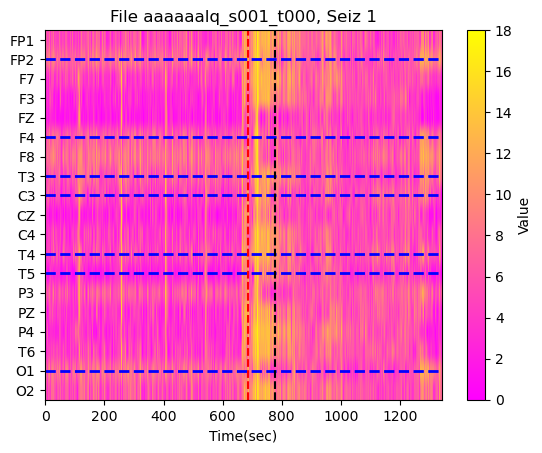

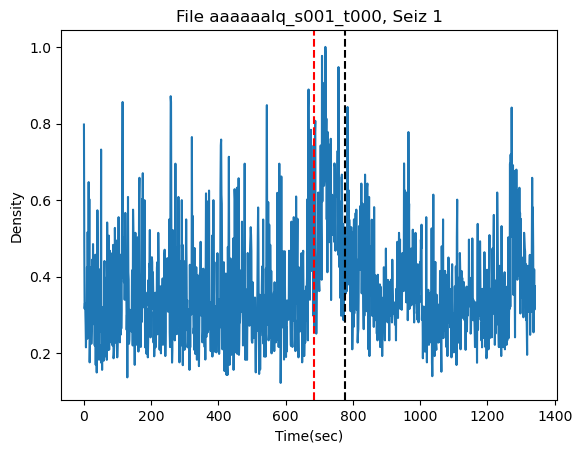

In [13]:
# Visualize the Nodes' Centrality and Density of graphs in an instant seizure
plt.imshow((np.array(CentralityElectrodesDn[file_num][seiz_num])).T, cmap='spring', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Time(sec)')
# plt.ylabel('Electrode#')
plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
for idx in selected_indices:
        plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.title(f'File {nRecNam[file_num][:18]}, Seiz {seiz_num+1}')
plt.show()

# plt.imshow((np.array(CentralityElectrodesEn[file_num][seiz_num])).T, cmap='spring', aspect='auto')
# plt.colorbar(label='Value')
# plt.xlabel('Time(sec)')
# # plt.ylabel('Electrode#')
# plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
# selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
# for idx in selected_indices:
#         plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
# plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
# plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
# plt.title(f'File {RecNam[file_num][:18]}, Seiz {seiz_num+1}')
# plt.show()

plt.plot(Densities[file_num][seiz_num])
plt.xlabel('Time(sec)')
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.ylabel('Density')
plt.title(f'File {nRecNam[file_num][:18]}, Seiz {seiz_num+1}')
plt.show()

In [14]:
def average_graphs(graph_list, all_nodes):
    """
    Averages multiple graphs (of the same nodes) by averaging their adjacency matrices.

    Args:
        graph_list (list): A list of NetworkX graphs to average.

    Returns:
        nx.Graph: A new graph with averaged edge weights.
    """
    # Get the list of nodes (assumes all graphs have the same nodes)
    # nodes = graph_list[0].nodes()
    n = len(all_nodes)

    # Initialize an empty adjacency matrix
    avg_adj_matrix = np.zeros((n, n))

    # Sum adjacency matrices
    for G in graph_list:
        adj_matrix = nx.to_numpy_array(G, nodelist=all_nodes)
        avg_adj_matrix += adj_matrix

    # Average the adjacency matrix
    avg_adj_matrix /= len(graph_list)

    # Create a new graph with the averaged adjacency matrix
    avg_graph = nx.from_numpy_array(avg_adj_matrix)

    # Relabel nodes to match the original nodes
    mapping = dict(zip(range(n), all_nodes))
    avg_graph = nx.relabel_nodes(avg_graph, mapping)

    return avg_graph

In [15]:
# Retain the top edges of the average graph
def TopEdgesGraph(graph, threshold):
    """
    Filters a graph to retain only edges with weights above a given threshold.

    Args:
        graph (nx.Graph): The input graph with weighted edges.
        threshold (float): The weight threshold for retaining edges.

    Returns:
        nx.Graph: A new graph containing only edges with weights above the threshold.
    """
    # Create a new graph
    filtered_graph = nx.Graph()

    # Add nodes from the original graph
    filtered_graph.add_nodes_from(graph.nodes(data=True))

    # Add edges with weights above the threshold
    # filtered_edges = [(u, v, d) for u, v, d in graph.edges(data=True) if d['weight'] > threshold]
    filtered_edges = [(u, v, {'weight': 1}) for u, v, d in graph.edges(data=True) if d['weight'] > threshold]
    filtered_graph.add_edges_from(filtered_edges)

    return filtered_graph

In [16]:
pos = {'FP1': (-0.3, 0.8),
 'FP2': (0.3, 0.8),
 'F3': (-0.4, 0.4),
 'F4': (0.4, 0.4),
 'C3': (-0.5, 0.0),
 'C4': (0.5, 0.0),
 'P3': (-0.4, -0.4),
 'P4': (0.4, -0.4),
 'O1': (-0.3, -0.8),
 'O2': (0.3, -0.8),
 'F7': (-0.7, 0.5),
 'F8': (0.7, 0.5),
 'T3': (-0.8, 0),
 'T4': (0.8, 0),
 'T5': (-0.6, -0.5),
 'T6': (0.6, -0.5),
 'FZ': (0.0, 0.3),
 'CZ': (0.0, 0.0),
 'PZ': (0.0, -0.3)}

In [17]:
def cosine_similarity(matrix1, matrix2):
    """
    Calculate cosine similarity between corresponding columns of two matrices.

    Args:
        matrix1 (np.ndarray): First matrix.
        matrix2 (np.ndarray): Second matrix.
    
    Returns:
        np.ndarray: Array of cosine similarities for each column pair.
    """
    nrow, ncol = matrix1.shape
    cosine_similarities = []
    
    for j in range(ncol):
        col1 = matrix1[:, j]
        col2 = matrix2[:, j]
        
        # Cosine Similarity
        dot_product = np.dot(col1, col2)
        norm_col1 = np.linalg.norm(col1)
        norm_col2 = np.linalg.norm(col2)
        
        # Avoid division by zero
        if norm_col1 == 0 or norm_col2 == 0:
            cosine_sim = 0
        else:
            cosine_sim = dot_product / (norm_col1 * norm_col2)
        
        cosine_similarities.append(cosine_sim)
    
    return np.array(cosine_similarities)

In [21]:
file_num = 57
seiz_num = 0

graphs_bi = all_data[file_num]['graphs_bi']
# Update the graphs to include all the nodes and corresponding electrode locations
u_graphs_bi = []
Gnode = list(graphs_bi[0].nodes)
if 'LE' in Gnode[0]:
    all_nodes = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F7-LE', 'EEG F3-LE', 'EEG FZ-LE', 'EEG F4-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG C3-LE', 'EEG CZ-LE', 'EEG C4-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG P3-LE', 'EEG PZ-LE', 'EEG P4-LE', 'EEG T6-LE', 'EEG O1-LE', 'EEG O2-LE']
    electrode_locations = {
    'EEG FP1-LE': [-0.3, 0.8],
    'EEG FP2-LE': [0.3, 0.8],
    'EEG F7-LE': [-0.7, 0.5],
    'EEG F3-LE': [-0.4, 0.4],
    'EEG FZ-LE': [0.0, 0.3],
    'EEG F4-LE': [0.4, 0.4],
    'EEG F8-LE': [0.7, 0.5],
    'EEG T3-LE': [-0.8, 0.0],
    'EEG C3-LE': [-0.5, 0.0],
    'EEG CZ-LE': [0.0, 0.0],
    'EEG C4-LE': [0.5, 0.0],
    'EEG T4-LE': [0.8, 0.0],
    'EEG T5-LE': [-0.6, -0.5],
    'EEG P3-LE': [-0.4, -0.4],
    'EEG PZ-LE': [0.0, -0.3],
    'EEG P4-LE': [0.4, -0.4],
    'EEG T6-LE': [0.6, -0.5],
    'EEG O1-LE': [-0.3, -0.8],
    'EEG O2-LE': [0.3, -0.8]
}
else:
    all_nodes = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F7-REF', 'EEG F3-REF', 'EEG FZ-REF', 'EEG F4-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG C3-REF', 'EEG CZ-REF', 'EEG C4-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG P3-REF', 'EEG PZ-REF', 'EEG P4-REF', 'EEG T6-REF', 'EEG O1-REF', 'EEG O2-REF']
    electrode_locations = {
    'EEG FP1-REF': [-0.3, 0.8],
    'EEG FP2-REF': [0.3, 0.8],
    'EEG F7-REF': [-0.7, 0.5],
    'EEG F3-REF': [-0.4, 0.4],
    'EEG FZ-REF': [0.0, 0.3],
    'EEG F4-REF': [0.4, 0.4],
    'EEG F8-REF': [0.7, 0.5],
    'EEG T3-REF': [-0.8, 0.0],
    'EEG C3-REF': [-0.5, 0.0],
    'EEG CZ-REF': [0.0, 0.0],
    'EEG C4-REF': [0.5, 0.0],
    'EEG T4-REF': [0.8, 0.0],
    'EEG T5-REF': [-0.6, -0.5],
    'EEG P3-REF': [-0.4, -0.4],
    'EEG PZ-REF': [0.0, -0.3],
    'EEG P4-REF': [0.4, -0.4],
    'EEG T6-REF': [0.6, -0.5],
    'EEG O1-REF': [-0.3, -0.8],
    'EEG O2-REF': [0.3, -0.8]
}
for graph in graphs_bi:
    missing_nodes = [node for node in all_nodes if node not in graph]
    graph.add_nodes_from(missing_nodes)  # Add missing nodes without connections
    u_graphs_bi.append(graph)

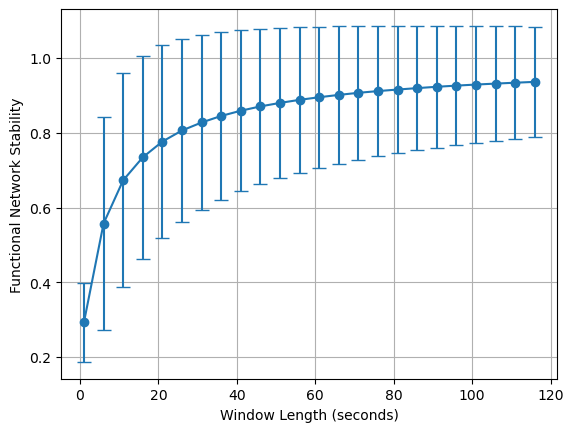

In [19]:
# Calculate and plot functional network stability with respect to window length
topgraphs = []
mcc = []
scc = []
   

for el in range(1, 121, 5):
    for i in range(start_point-600, start_point-420, 1):
    
        graph_list = u_graphs_bi[i:i+el]
        avgGraph = average_graphs(graph_list, all_nodes)
        topedges_graph = TopEdgesGraph(avgGraph, 0.7)

        topgraphs.append(topedges_graph)

        cc = []
        for gn in range(len(topgraphs)-1):
            # Get adjacency matrices
            A1 = nx.adjacency_matrix(topgraphs[gn], nodelist= list(electrode_locations.keys()), dtype=None, weight='weight').toarray()
            A2 = nx.adjacency_matrix(topgraphs[gn+1], nodelist= list(electrode_locations.keys()), dtype=None, weight='weight').toarray()

            matrix1 = A1
            matrix2 = A2

            # Compute means
            mean1 = np.mean(matrix1)
            mean2 = np.mean(matrix2)

            # Center the matrices
            centered_matrix1 = matrix1 - mean1
            centered_matrix2 = matrix2 - mean2

            # Compute numerator (element-wise product and sum)
            numerator = np.sum(centered_matrix1 * centered_matrix2)

            # Compute denominator (product of standard deviations)
            denominator = np.sqrt(np.sum(centered_matrix1 ** 2) * np.sum(centered_matrix2 ** 2))

            # Compute normalized cross-correlation
            cross_correlation = numerator / denominator
            cc.append(cross_correlation)
    mcc.append(np.mean(cc))
    scc.append(np.std(cc))


x = np.arange(1, 121, 5) 
plt.errorbar(x, mcc, yerr=scc, fmt='-o', capsize=5, label='Mean ± Std')
plt.xlabel("Window Length (seconds)")
plt.ylabel("Functional Network Stability")
plt.grid(True)
plt.show()

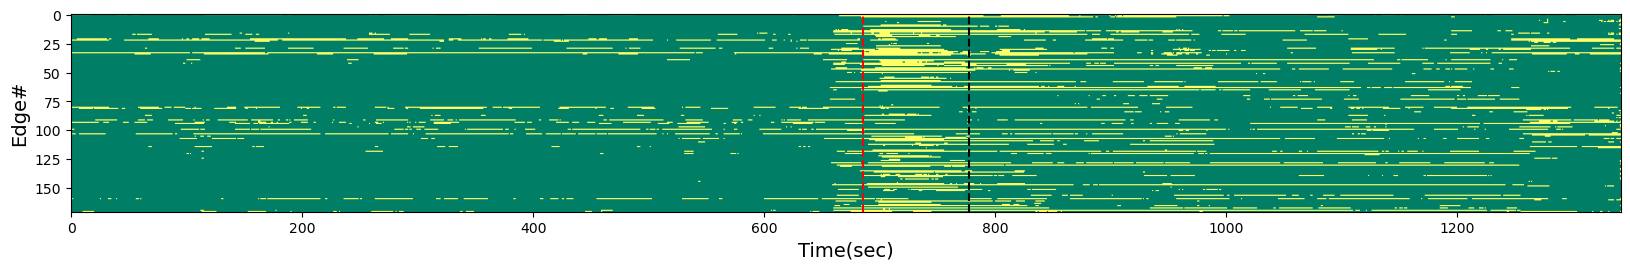

In [22]:
file_num = 57
seiz_num = 0

# Creat Core Graphs
topgraphs = []

for i in range(0, len(Densities[file_num][seiz_num]), 1):
    graph_list = u_graphs_bi[i:i+20]
    avgGraph = average_graphs(graph_list, all_nodes)
    topedges_graph = TopEdgesGraph(avgGraph, 0.7)

    topgraphs.append(topedges_graph)

node_order = list(electrode_locations.keys()) 
# Create all possible edges
all_possible_edges = [(node_order[i], node_order[j]) for i in range(len(node_order)) for j in range(i + 1, len(node_order))]

# Sort edges based on node order
def edge_sort_key(edge):
    u, v = edge
    # Sort edges based on the first node, then the second node according to node_order
    return (node_order.index(u), node_order.index(v))

E_W = []
for G in topgraphs:

    # Ensure all possible edges are in the graph with default weight of 0
    for u, v in all_possible_edges:
        if not G.has_edge(u, v):
            G.add_edge(u, v, weight=0)

    sorted_edges = sorted(G.edges(), key=edge_sort_key)

    edge_w = {(u, v): G[u][v]['weight'] for u, v in sorted_edges}
    E_W.append([G[u][v]['weight'] for u, v in sorted_edges])

plt.figure(figsize=(20, 5))  # Width and height in inches
plt.imshow(np.array(E_W).T, cmap='summer')  # You can specify a colormap, like 'viridis'
plt.xlabel('Time(sec)', fontsize=14)
plt.ylabel('Edge#', fontsize=14)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.show()

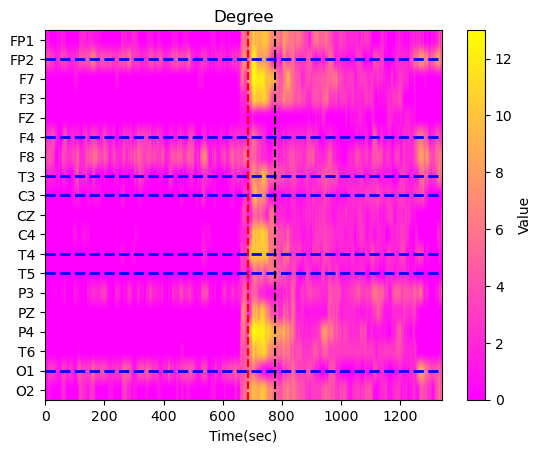

In [23]:
# Calculate the core graph and its corresponding degree centrality 
topgraphs = []
for i in range(0, len(Densities[file_num][seiz_num]), 1):
    graph_list = u_graphs_bi[i:i+20]
    avgGraph = average_graphs(graph_list, all_nodes)
    topedges_graph = TopEdgesGraph(avgGraph, 0.7)

    topgraphs.append(topedges_graph)

# Calculate degree centrality of core
CentralityCoreD = {}

cntmat = []
for i in range(len(topgraphs)):    
    # Compute unnormalized degree centrality
    centrality_d = dict(topgraphs[i].degree())

    c_centrality_d = {key.replace('-REF', '').replace('-LE', ''): value for key, value in centrality_d.items()}
    order = ['EEG FP1', 'EEG FP2', 'EEG F7', 'EEG F3', 'EEG FZ', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG CZ', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG PZ', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2']

    c_centrality_dn = sort_dict_by_list_order(c_centrality_d, order)
    cntmat.append(list(c_centrality_dn.values()))

CentralityCoreD = cntmat

# Visualize the Nodes' Centrality and Density of graphs in an instant seizure
plt.imshow((np.array(cntmat)).T, cmap='spring', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Time(sec)')
plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
for idx in selected_indices:
        plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.title('Degree')
plt.show()

In [ ]:
# Calculate eigenvector centrality of core
CentralityCoreE = {}

cntmat = []
for i in range(len(topgraphs)):    
    # Compute unnormalized eigenvector centrality
    centrality_e = nx.eigenvector_centrality(graphs_bi[i], max_iter= 20000)

    
    c_centrality_e = {key.replace('-REF', '').replace('-LE', ''): value for key, value in centrality_e.items()}
    order = ['EEG FP1', 'EEG FP2', 'EEG F7', 'EEG F3', 'EEG FZ', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG CZ', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG PZ', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2']

    c_centrality_en = sort_dict_by_list_order(c_centrality_e, order)

    cntmat.append(list(c_centrality_en.values()))

CentralityCoreE = cntmat

# Visualize the Nodes' Centrality and Density of graphs in an instant seizure
plt.imshow((np.array(cntmat)).T, cmap='spring', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Time(sec)')
plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
for idx in selected_indices:
        plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.show()

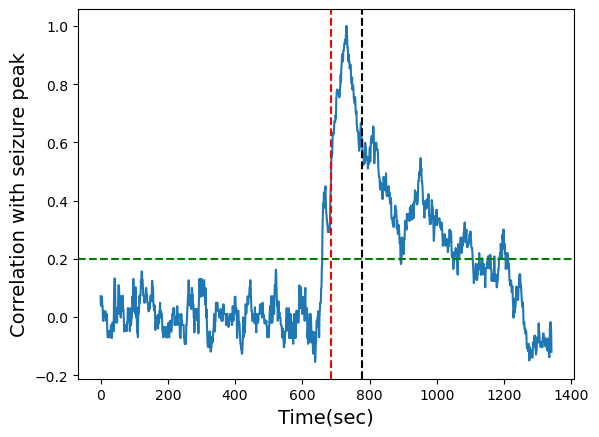

In [24]:
# Correlation of network edges' structure with that of seizure peak 
# Calculate correlation with values of all channels at all times
correlation_matrix = np.corrcoef((np.array(E_W)).T, rowvar=False)

# Extract the correlation of values at the specified time with all other times
correlation_with_time_of_interest = correlation_matrix[:, start_point+int((stop_point - start_point)/2)]

plt.plot(correlation_with_time_of_interest)
plt.xlabel('Time(sec)', fontsize=14)
plt.ylabel('Correlation with seizure peak', fontsize=14)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.axhline(y = 0.2, color='green', linestyle='--') 

In [25]:
from statsmodels.tsa.api import VAR

def fit_mvar(data, order):
    """
    Fit a Multivariate Autoregressive (MVAR) model and return coefficients.
    """
    model = VAR(data.T)  # Transpose to time × channels
    results = model.fit(order)
    # Reshape coefficients to (n_channels, n_channels, order)
    A = np.transpose(results.coefs, (1, 2, 0))  # (n_channels, n_channels, order)
    return A

In [26]:
def compute_pdc(A, freq, fs):
    """
    Compute Partial Directed Coherence (PDC) for a given frequency.

    Parameters:
    - A: MVAR coefficient matrix (n_channels × n_channels × order)
    - freq: Frequency (in Hz)
    - fs: Sampling frequency (in Hz)

    Returns:
    - PDC matrix (n_channels × n_channels)
    """
    n_channels, _, order = A.shape

    pdc_matrix = np.zeros((n_channels, n_channels, len(freq)))

    for f_idx, f in enumerate(freq):
        omega = 2 * np.pi * f/fs
        A_f = np.eye(n_channels, dtype=np.complex128)
        for k in range(order):
            A_f -= A[:, :, k] * np.exp(-1j * omega * (k + 1))

        for i in range(n_channels):
            denominator = np.sqrt(np.sum(np.abs(A_f[i, :]) ** 2))
            for j in range(n_channels):
                numerator = np.abs(A_f[i, j])
                pdc_matrix[i, j, f_idx] = numerator / denominator
                if j == i:
                    pdc_matrix[i, j, f_idx] = 0
    
    pdc_result = np.mean(pdc_matrix, axis =2)

    return pdc_result

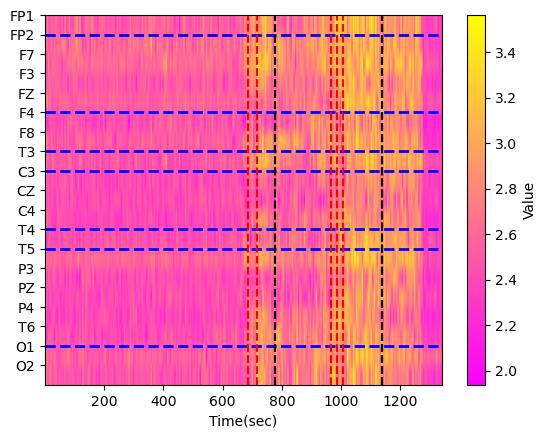

In [54]:
# Calculate and plot partial directed coherence connectivity
file_num = 57
seiz_num = 0
eeg = all_data[file_num]['eegICA']
eeg_data, times = eeg[:]

sfreq = int(eeg.info['sfreq'])

# Define model order
seconds = int(eeg_data.shape[1]/sfreq)
zn = 5
order = 1 # You can adjust based on Akaike/BIC criteria
nn = int(seconds/zn)
PDC_matrix_a = np.zeros([19, 19, nn])
outdegree = np.zeros([19, nn])
indegree = np.zeros([19, nn])

for en in range(1, nn):
    # Step 1: Fit MVAR model
    A = fit_mvar(eeg_data[:, (en-1)*250*zn:en*250*zn], order)  # A: MVAR coefficients

    # Step 2: Compute PDC for a specific frequency
    freq = np.arange(8, 13, 0.1)
    PDC_matrix_a[:, :, en] = compute_pdc(A, freq, sfreq)
    outdegree[:, en] = np.sum(PDC_matrix_a[:, :, en], axis=1)
    indegree[:, en] = np.sum(PDC_matrix_a[:, :, en], axis=0)

# Visualize the Nodes' outdegree of graphs in an instant seizure
plt.imshow(outdegree[:, 1:],  extent=[1, zn*outdegree.shape[1], 19, 0], cmap='spring', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Time(sec)')
plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
for idx in selected_indices:
        plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_1, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_1, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_2, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_2, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_3, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_3, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_4, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_4, color='black', linestyle='--', label='Seizure Stop') 
plt.show()

# # Visualize the Nodes' indegree of graphs in an instant seizure
# plt.imshow(indegree[start_point:],  extent=[1, zn*indegree.shape[1], 19, 0], cmap='spring', aspect='auto')
# plt.colorbar(label='Value')
# plt.xlabel('Time(sec)')
# plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
# selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
# for idx in selected_indices:
#         plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
# plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
# plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
# plt.show()


In [34]:
# Function to perform sliding window averaging
def sliding_window_average(matrix, window_size, step_size):
    # Initialize the result matrix
    averaged_matrix = np.zeros_like(matrix)

    # Perform the sliding window operation
    for start in range(0, matrix.shape[2] - window_size + 1, step_size):
        end = start + window_size
        averaged_matrix[:, :, start:end] = np.mean(matrix[:, :, start:end], axis=2, keepdims=True)
    
    return averaged_matrix

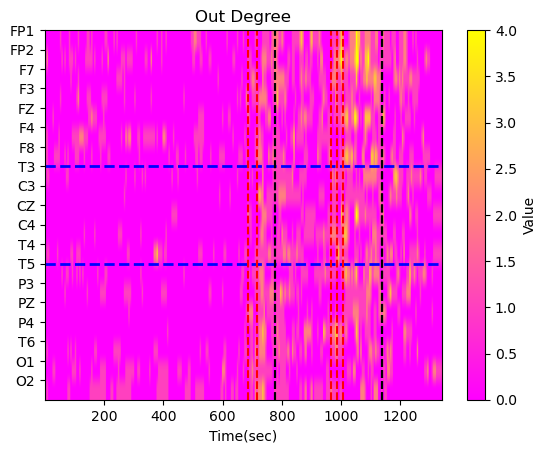

In [52]:
# Calculate and plot PDC for the core
# Parameters
window_size = 4 # 20/5
step_size = 1

# Calculate binary PDC matrices
PDC_b = (PDC_matrix_a>= 0.2).astype(int)
# Apply sliding window averaging
PDC_prob = sliding_window_average(PDC_b, window_size, step_size)

# Thresholding: values above 0.7 become 1, others become 0
PDC_Core = (PDC_prob > 0.5).astype(int)

outdegree_core = np.sum(PDC_Core, axis=1)
indegree_core = np.sum(PDC_Core, axis=0)

# Visualize the Nodes' outdegree of core graphs in an instant seizure
plt.imshow(outdegree_core[:, 1:],  extent=[1, zn*outdegree.shape[1], 19, 0], cmap='spring', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Time(sec)')
plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
for idx in selected_indices:
        plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_1, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_1, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_2, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_2, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_3, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_3, color='black', linestyle='--', label='Seizure Stop') 
plt.axvline(x=start_point_4, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point_4, color='black', linestyle='--', label='Seizure Stop') 
plt.title('Out Degree')
plt.show()

# # Visualize the Nodes' indegree of core graphs in an instant seizure
# plt.imshow(indegree_core,  extent=[0, zn*indegree.shape[1], 19, 0], cmap='spring', aspect='auto')
# plt.colorbar(label='Value')
# plt.xlabel('Time(sec)')
# plt.yticks(ticks=np.arange(len(electrodes)), labels=electrodes)
# selected_indices = [electrodes.index(el) for el in ROI_list[seiz_num]]
# for idx in selected_indices:
#         plt.axhline(y=idx, color='b', linestyle='--', linewidth=2)
# plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
# plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
# plt.title('In Degree')
# plt.show()

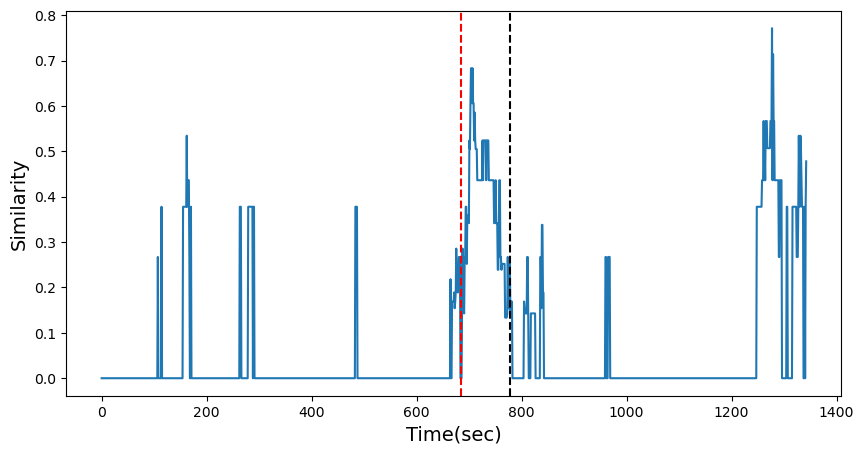

In [33]:
# Calculate and plot cosine similarity for degree centrality hubs
ROIs = nFOZ[file_num]
# Mapping electrode names to indices
electrode_indices = {electrode: index + 1 for index, electrode in enumerate(electrodes)}
# Replace electrode names with indices
mapped_ROIs = {tuple(map(int, key)): [electrode_indices[e] for e in value] for key, value in ROIs.items()}

thr = 5
deg = np.array(CentralityCoreD).T
hub_graph = (deg> thr).astype(int)

SOZmatrix = np.zeros((19, int(eeg_data.shape[1]/(sfreq))), dtype=int)
for row in next(iter(mapped_ROIs.items()))[1]:
    SOZmatrix[row - 1, :] = 1
cosineS =cosine_similarity(SOZmatrix, hub_graph)

x = np.linspace(0, len(cosineS), len(cosineS))

# Plot the array
plt.figure(figsize=(10, 5))
plt.plot(x, cosineS)
plt.axvline(x=start_point, color='red', linestyle='--', label='Seizure Start') 
plt.axvline(x=stop_point, color='black', linestyle='--', label='Seizure Stop') 
plt.xlabel('Time(sec)', fontsize=14)
plt.ylabel('Similarity', fontsize=14)
plt.show()